# Práctica 1. Parte 0. Ejercicio 1

In [6]:
import matplotlib.pyplot as plt
import numpy as np

Creamos variables con los valores para este ejercicio particular.

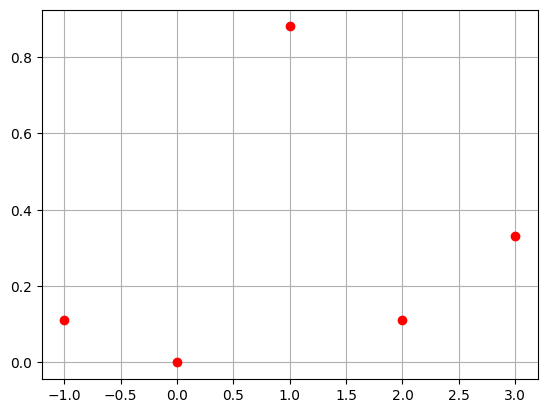

In [7]:
puntos = [[-1, 0.11], [0, 0], [1, 0.88], [2, 0.11], [3, 0.33]]
x = [p[0] for p in puntos]
y = [p[1] for p in puntos]
f1 = [1 for punto in puntos]
f2 = x
f3 = [xs**2 for xs in x]

# Representamos los puntos:
plt.plot(x, y, "ro")
plt.grid()
plt.show()

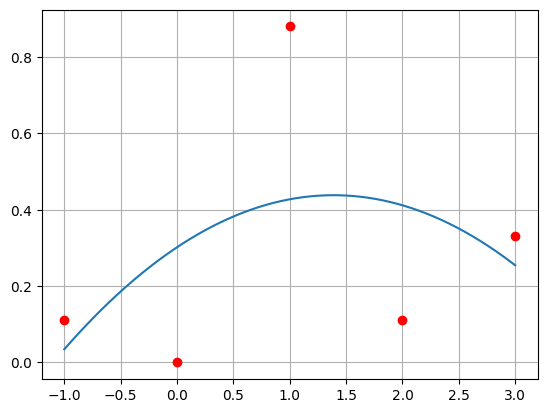

In [8]:
# Caculamos las matrices que nos proporcionan el vector a
B = np.array([f1, f2, f3]).T
BT = B.T
y = np.array(y)
BTB_1 = np.linalg.inv(np.matmul(BT, B))
BTB_1BT = np.matmul(BTB_1, BT)
a = np.matmul(BTB_1BT, y)

# Representamos la función:
x_fun = np.linspace(-1, 3, 10000)
y_fun = a[0] + a[1] * x_fun + a[2] * x_fun**2
plt.plot(x, y, "ro")
plt.grid()
plt.plot(x_fun, y_fun)
plt.show()

[0.00568947 0.09103151 0.2048209  0.09103151 0.00568947]
Error cuadrático medio:  0.07965257142857143


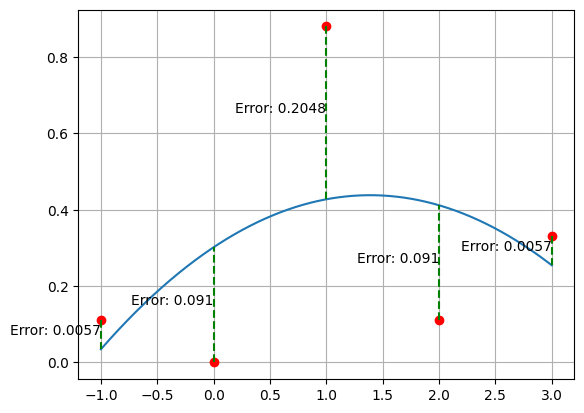

In [9]:
# Calculamos los y estimados (y_hat) para los puntos originales
y_hat = a[0] + a[1] * np.array(x) + a[2] * np.array(x)**2
errores = np.power(y_hat - y, 2)
print(errores)
suma_errores = np.sum(errores)
error_cuadratico_medio = suma_errores / len(x)
print("Error cuadrático medio: ", error_cuadratico_medio)

# Ahora dibujamos la función, los puntos y los errores
# Dibujamos las líneas verticales que representan los errores
plt.grid()
plt.plot(x_fun, y_fun, label="Función ajustada")  # La curva ajustada
plt.plot(x, y, "ro", label="Puntos originales")   # Los puntos originales
for i, punto in enumerate(puntos):
    plt.plot([x[i], x[i]], [y[i], y_hat[i]], "g--")  # Línea de error
    error = np.round(errores[i], 4)  # Redondeamos el error para mostrarlo
    plt.text(x[i], (y[i] + y_hat[i]) / 2, f'Error: {error}', ha='right')  # Etiqueta del error
plt.show()

In [10]:
# Calculamos ahora f(2,5)
f_2_5 = a[0] + a[1] * 2.5 + a[2] * 2.5**2
print("f(2.5) = ", f_2_5)

f(2.5) =  0.3508214285714285
